<h1> Making an predictive model using Support Vector Machine</h1>
In deze jupyter notebook file, worden de de decision tree gemaakt. 
Dit wordt gedaan om de onderzoeksvraag van mijn thesis te kunnen beantwoorden:
To what extent can support vector machine, randomforest tree, or Gradient Boosting Machine contributeto predicting the demand for the specialist youth caresegments in Amsterdam?
Ook is dit nodig voor het beantwoorden van mijn sub vraen:
•Are there neighborhood socio-demographic characteristics which are predictive of the use of youth caresegments?
•Which of the tested models has the highest f1 score in predicting the youth care segment use?


<h3>Hier onder worden eerst de benodigde librabry geimporteerd</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import mean
from collections import Counter
from matplotlib import pyplot

from sklearn.preprocessing import scale

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.svm import SVC

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler


Om de sub onderzoeks vraag: Which of the tested models has the highest f1-score in predicting the youth care segment use? Waarom we voor deze score hebben gekozen, kan gelezen worden onder het kopje "model eveluation".

Ook maken we een aantal variabele hier aan om de code zo gestructuurd mogelijk te houden. Waarom deze nodig zijn, valt te lezen in het kopje "model making'

In [2]:
 def calculateMetrics(model):
        y_predicted = model.predict(X_test_scaled)
        print(model)
        print ("F1 score")
        print(f1_score(y_test, y_predicted, average='micro'))

<h3> Laad de data in, die gemaakt is uit de andere jupyter notebook file</h3>
Split the data in indepentend variable an dependent variable. Also get dummies from the binary values in the data set. 

In [3]:
## load data
df = pd.read_pickle("C:\\VERTROUWELIJK\\final_dataSet.pkl")

# split the data in indepentend variable an dependent variable. 
X = df.drop(['Voorziening'], axis=1)
X_encoded = pd.get_dummies(X, columns=['Geslacht'])
X_Original_Scaled = scale(X_encoded)

y = df['Voorziening'].copy()

transform the dependent variable to value instead of strings. This is needed for making an good SVM model

In [4]:
y = LabelEncoder().fit_transform(y)

Summarize distribution of the dependent variabele. This in oder for making an figure which can be seen in the report in fig X

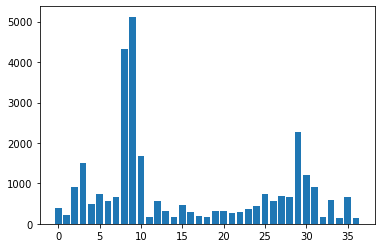

In [5]:
counter = Counter(y)
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

make test and train set. Also scale the data. Which is neccesary for SVM.  Waarom dit nodig is, zie "making model"

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,random_state=100)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

create inital SVM model, with an decision function for one vs one. An CV is used in order to shuffle the train data. See report.  Immedelty calcutale the F1 score to compare this.

In [7]:
clf_svm = SVC(decision_function_shape='ovo', random_state=42)
print(clf_svm)
scores = cross_val_score(clf_svm, X_train, y_train, cv=5, scoring='f1_micro')
score = mean(scores)
print("f1_score: %.2f%%" % (score * 100.0))

SVC(decision_function_shape='ovo', random_state=42)
f1_score: 33.04%


based nt he above F1 score, I choose to make more model SVC models, with different kernels in order the get the best kernel for this SVC.

In [8]:
linear = SVC(kernel='linear', decision_function_shape='ovo').fit(X_train_scaled, y_train)
calculateMetrics(linear)
rbf = SVC(kernel='rbf', decision_function_shape='ovo').fit(X_train_scaled, y_train)
calculateMetrics(rbf)
poly = SVC(kernel='poly', decision_function_shape='ovo').fit(X_train_scaled, y_train)
calculateMetrics(poly)
sig = SVC(kernel='sigmoid', decision_function_shape='ovo').fit(X_train_scaled, y_train)
calculateMetrics(sig)

SVC(decision_function_shape='ovo', kernel='linear')
F1 score
0.3473627411304465
SVC(decision_function_shape='ovo')
F1 score
0.24794280318359638
SVC(decision_function_shape='ovo', kernel='poly')
F1 score
0.23040604343720492
SVC(decision_function_shape='ovo', kernel='sigmoid')
F1 score
0.16417105085660327


Zoals gezegd, de data is erg imbalanced. Daarom maken we een decision tree with random undersampling. Zie model making in report voor meer uitleg

In [9]:
steps = [('under', RandomUnderSampler()), ('model', SVC(decision_function_shape='ovo', random_state=42))]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=100, n_repeats=5, random_state=42)
scores = cross_val_score(pipeline, X_Original_Scaled, y, scoring='f1_micro', cv=cv, n_jobs=-1)
# calculate the mean of all these SVC. 
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.068


In Result part, we described that we not made the GridSearchCV for SVM.

In [10]:
# param_grid = [ {'C': [1.0]},
#      'kernel': ['linear'],
#     {'gamma': [1.0]}
#              ]

# cv_method = RepeatedStratifiedKFold(n_splits=5, 
#                                     n_repeats=3, 
#                                     random_state=42)
# optimal_params = GridSearchCV(
# SVC(decision_function_shape='ovo', random_state=42),
# param_grid, 
# scoring='f1_micro',
# verbose =10
# )

# optimal_params.fit(X_Original_Scaled,y)
